## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,8)
import seaborn as sns

In [ ]:
data = pd.read_excel("data.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Description of the features

1. age - Age in years
2. sex - {1:Male,0:Female}
3. cp - Chest pain type
4. trestbps - Resting blook pressure
5. chol - Serum Cholestrol
6. fbs - Fasting blood pressure>120mg/dl {1:True,0:False}
7. restecg - Resting electrocardiographic results
8. thalac - Maximum Heartrate achieved
9. exang - Exercise induced angina {1:Yes, 0:No}
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - Slope of the peak exercise ST segment
12. ca - Number of major vessels (0-3) colored by fluoroscopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target - 1 or 0

## Preliminary Analysis

In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()

We have dealt with duplicates

There are 13 independent variable and 1 dependent variable (target)

## Univariate and Bivariate Analysis

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(<Figure size 540x252 with 1 Axes>, <Axes:>)

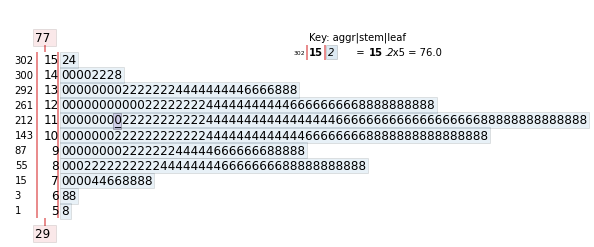

In [ ]:
import stemgraphic
stemgraphic.stem_graphic(data['age'], scale = 5)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

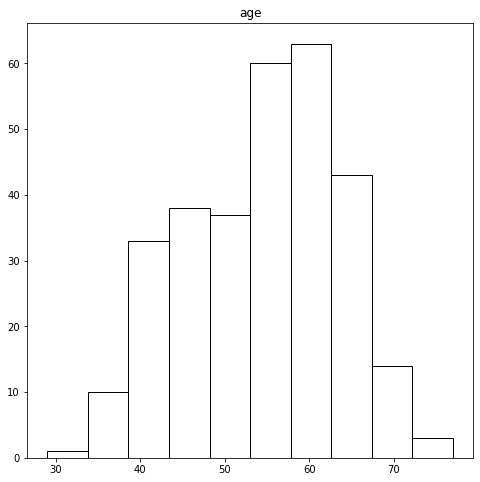

In [ ]:
data.hist('age', color = 'white',edgecolor = 'black', grid = False)

Min age is 29 and max is 77. We can see that 50% of sample ages fall between 48 - 61 years of age


In [ ]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [ ]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [ ]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' ]

In [ ]:
data[cat] = data[cat].astype('object')
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [ ]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [ ]:
data.describe(include = np.object)

C:\Users\user\AppData\Local\Temp\ipykernel_19988\2743208382.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,206,143,257,151,203,141,175,165,164


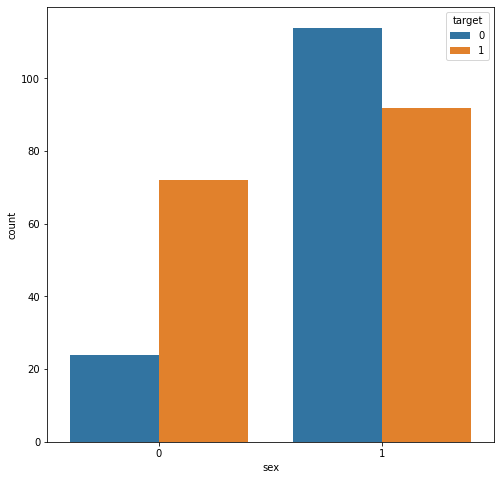

In [ ]:
ax=sns.countplot(x= 'sex', hue= 'target', data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

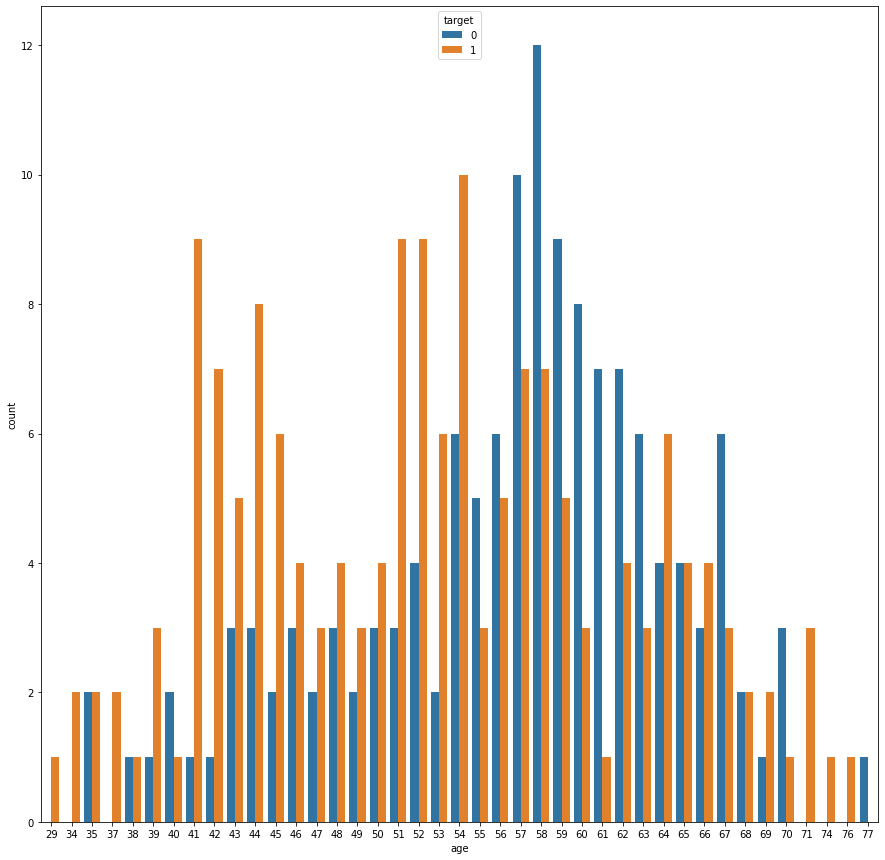

In [ ]:
matplotlib.rcParams["figure.figsize"] = (15,15)
sns.countplot(data = data, x = 'age', hue = 'target')

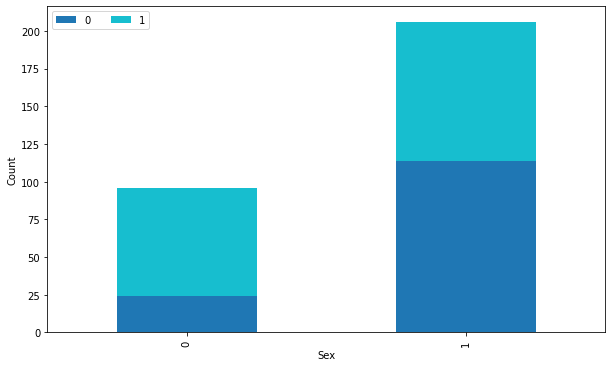

In [ ]:
cross_tab = pd.crosstab(index=data['sex'],
                             columns=data['target'])
cross_tab

cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

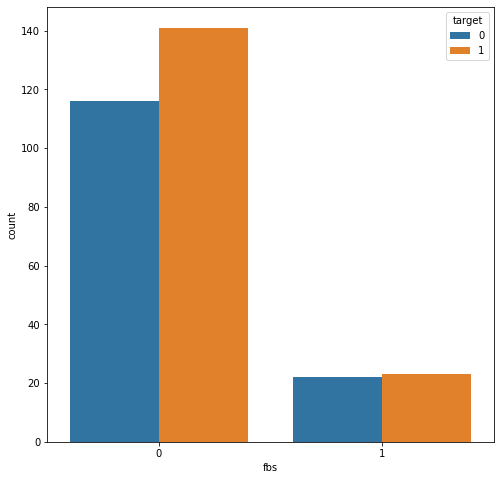

In [ ]:
ax=sns.countplot(x= "fbs", hue= 'target', data=data)

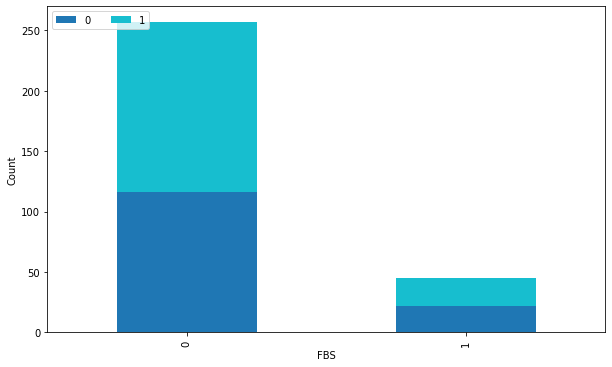

In [ ]:
cross_tab = pd.crosstab(index=data['fbs'],
                             columns=data['target'])
cross_tab

cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("FBS")
plt.ylabel("Count")
plt.show()

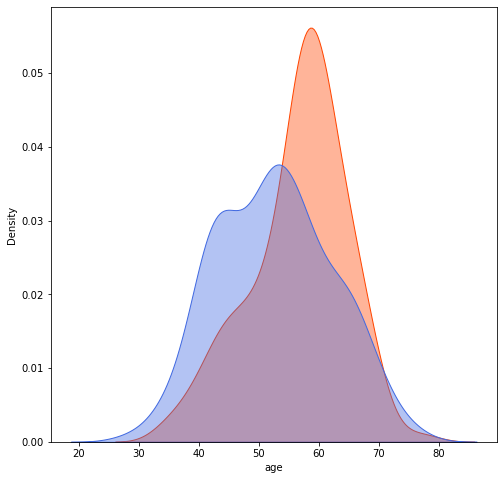

In [ ]:
CVD_No = data[data["target"] == 0]
CVD_Yes = data[data["target"] == 1]

X1 = CVD_No["age"]
X2 = CVD_Yes["age"]
L1=sns.kdeplot(X1, shade=True, label="No", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Yes",color='royalblue', alpha=0.4)

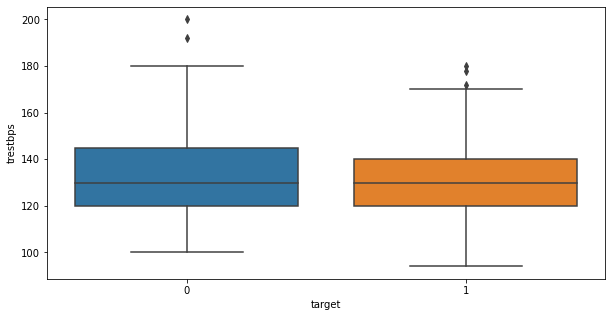

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x = data['target'], y= data['trestbps'])

plt.show()


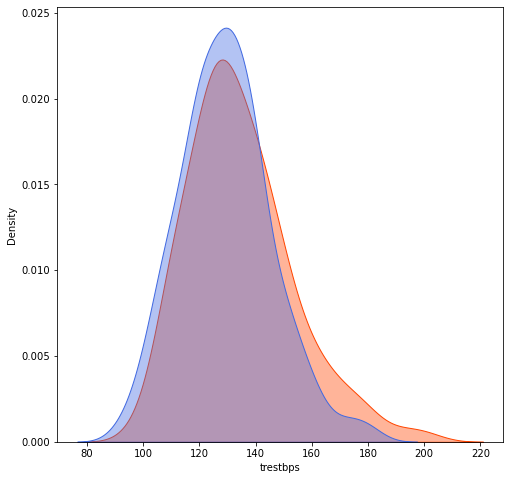

In [ ]:
X1 = CVD_No["trestbps"]
X2 = CVD_Yes["trestbps"]
L1=sns.kdeplot(X1, shade=True, label="No attack", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Yes",color='royalblue', alpha=0.4)

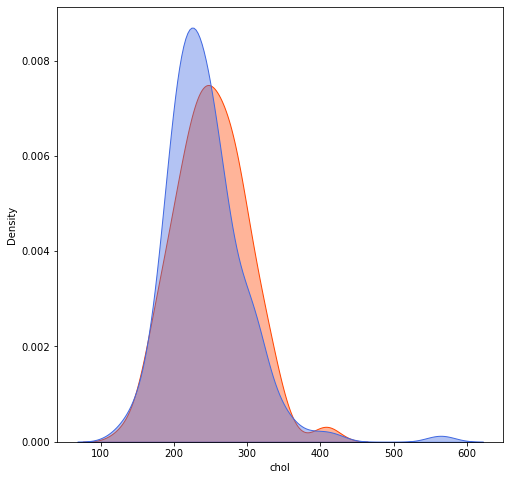

In [ ]:
X1 = CVD_No["chol"]
X2 = CVD_Yes["chol"]
L1=sns.kdeplot(X1, shade=True, label="No attack", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Yes",color='royalblue', alpha=0.4)

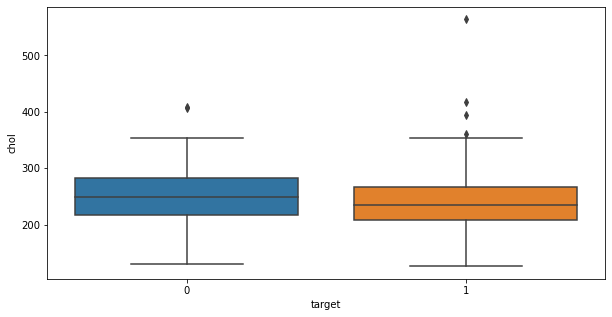

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x = data['target'], y= data['chol'])

plt.show()

In [ ]:
CVD_No.describe()

,age,trestbps,chol,thalach,oldpeak
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,56.601449,134.398551,251.086957,139.101449,1.585507
std,7.962082,18.729944,49.454614,22.598782,1.300340
min,35.000000,100.000000,131.000000,71.000000,0.000000
25%,52.000000,120.000000,217.250000,125.000000,0.600000
50%,58.000000,130.000000,249.000000,142.000000,1.400000
75%,62.000000,144.750000,283.000000,156.000000,2.500000
max,77.000000,200.000000,409.000000,195.000000,6.200000


In [ ]:
CVD_Yes.describe()

,age,trestbps,chol,thalach,oldpeak
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,52.585366,129.250000,242.640244,158.378049,0.586585
std,9.511957,16.204739,53.456580,19.199080,0.781734
min,29.000000,94.000000,126.000000,96.000000,0.000000
25%,44.750000,120.000000,208.750000,148.750000,0.000000
50%,52.000000,130.000000,234.500000,161.000000,0.200000
75%,59.000000,140.000000,267.250000,172.000000,1.025000
max,76.000000,180.000000,564.000000,202.000000,4.200000


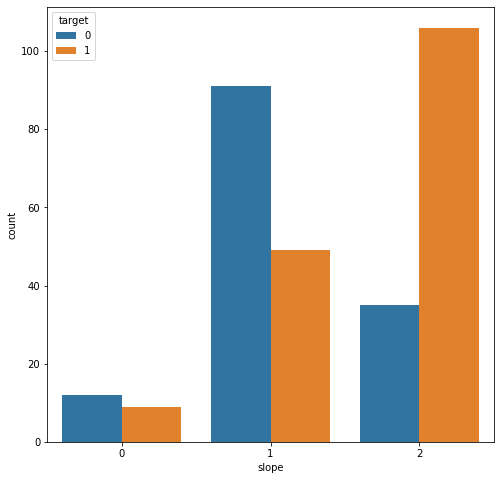

In [ ]:
ax=sns.countplot(x= 'slope', hue= 'target', data=data)

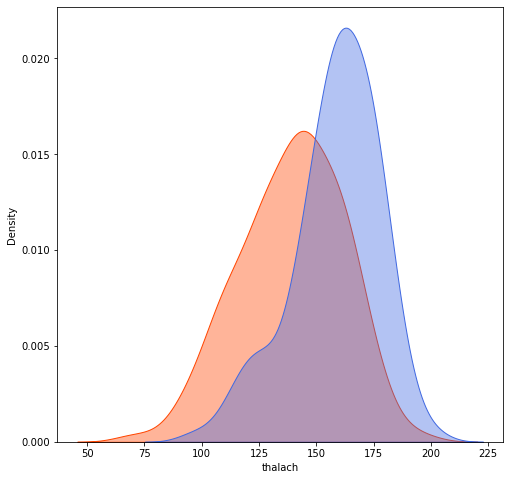

In [ ]:
X1 = CVD_No["thalach"]
X2 = CVD_Yes["thalach"]
L1=sns.kdeplot(X1, shade=True, label="No", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Yes",color='royalblue', alpha=0.4)

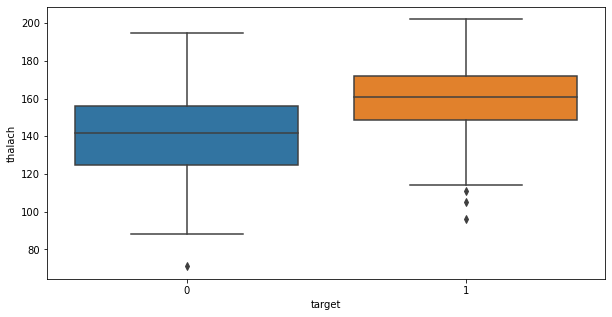

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x = data['target'], y= data['thalach'])

plt.show()

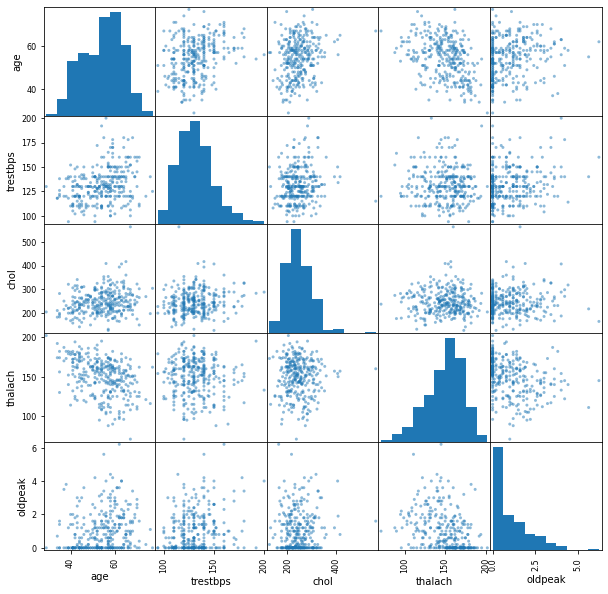

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']],
              figsize=(10,10))
plt.show()

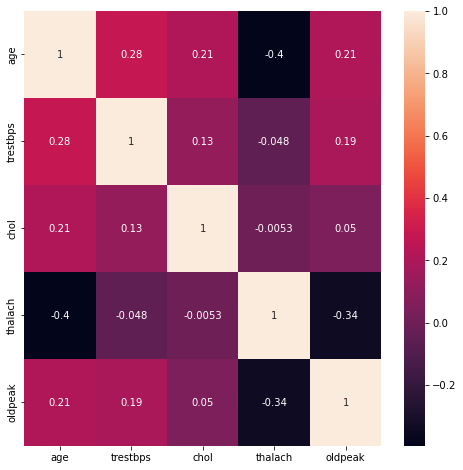

In [ ]:
dataplot = sns.heatmap(data.corr(),annot = True)
plt.show()

## Logistic Regression

In [ ]:
X = data.drop('target', axis = 1)
y = data.target
y = y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape, y_train.shape)

(241, 13) (241,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_mod = LogisticRegression(penalty='l2')
log_mod = log_mod.fit(X_train,y_train)
log_pred = log_mod.predict(X_test)

log_train = log_mod.score(X_train, y_train)
log_test = log_mod.score(X_test, y_test)

print(log_train, log_test)

print(classification_report(y_test,log_pred))
print('Accuracy : ' + str(accuracy_score(y_test, log_pred)))
conf_m = confusion_matrix(y_test, log_pred)
print(conf_m)

0.8257261410788381 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy : 0.8688524590163934
[[24  5]
 [ 3 29]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = RandomForestClassifier(max_depth=5, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.8852459016393442
[[25  4]
 [ 3 29]]


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

svc_model=SVC(C= 1, gamma=1, kernel= 'linear')
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)


print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy Score:
0.9344262295081968
[[25  4]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.89      1.00      0.94        32

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
kfold = KFold(n_splits=4,random_state=0,shuffle=True)
print(cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy'))

[0.85526316 0.78947368 0.85333333 0.81333333]


In [ ]:
print(cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy').mean())

0.8278508771929826


In [ ]:
feature_labels = list(X)
feature_importance = pd.DataFrame({'Feature' : feature_labels, 'Importance' : classifier.feature_importances_})

In [ ]:
feature_importance[feature_importance['Importance']>0.06]

,Feature,Importance
0,age,0.078779
2,cp,0.176375
4,chol,0.063693
7,thalach,0.087699
8,exang,0.106056
9,oldpeak,0.107162
11,ca,0.120288
12,thal,0.108858


In [ ]:
X1 = data[['age', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

X1_train,X1_test,y_train,y_test = train_test_split(X1,y, test_size = 0.2)
print(X1_train.shape, y_train.shape)

(241, 10) (241,)


In [ ]:
classifier = RandomForestClassifier(max_depth=5, random_state=0)
classifier.fit(X1_train, y_train)
y1_pred = classifier.predict(X1_test)

print('Accuracy : ' + str(accuracy_score(y_test, y1_pred)))
conf_m1 = confusion_matrix(y_test, y1_pred)
print(conf_m1)

Accuracy : 0.819672131147541
[[17  6]
 [ 5 33]]


In [ ]:
log_mod1 = LogisticRegression(penalty='l2')
log_mod1 = log_mod1.fit(X1_train,y_train)
log_pred1 = log_mod1.predict(X1_test)

log_train1 = log_mod1.score(X1_train, y_train)
log_test1 = log_mod1.score(X1_test, y_test)

print(log_train1, log_test1)

print(classification_report(y_test,log_pred1))
print('Accuracy : ' + str(accuracy_score(y_test, log_pred1)))
conf_m = confusion_matrix(y_test, log_pred1)
print(conf_m)

0.8423236514522822 0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.85      0.92      0.89        38

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61

Accuracy : 0.8524590163934426
[[17  6]
 [ 3 35]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(data.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object


In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

for i in cat:
    data[i] = lbl.fit_transform(data[i].astype(str))

In [ ]:
X = data.drop('target', axis = 1)
y = data.target
y = y.astype('int')

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        23
           1       0.84      0.68      0.75        38

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.75      0.72      0.73        61

Accuracy : 0.7213114754098361
[[18  5]
 [12 26]]
